In [3]:
%pylab inline
import numpy as np
from numpy import genfromtxt

cmap=plt.get_cmap('jet_r')

Populating the interactive namespace from numpy and matplotlib


/home/luca/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


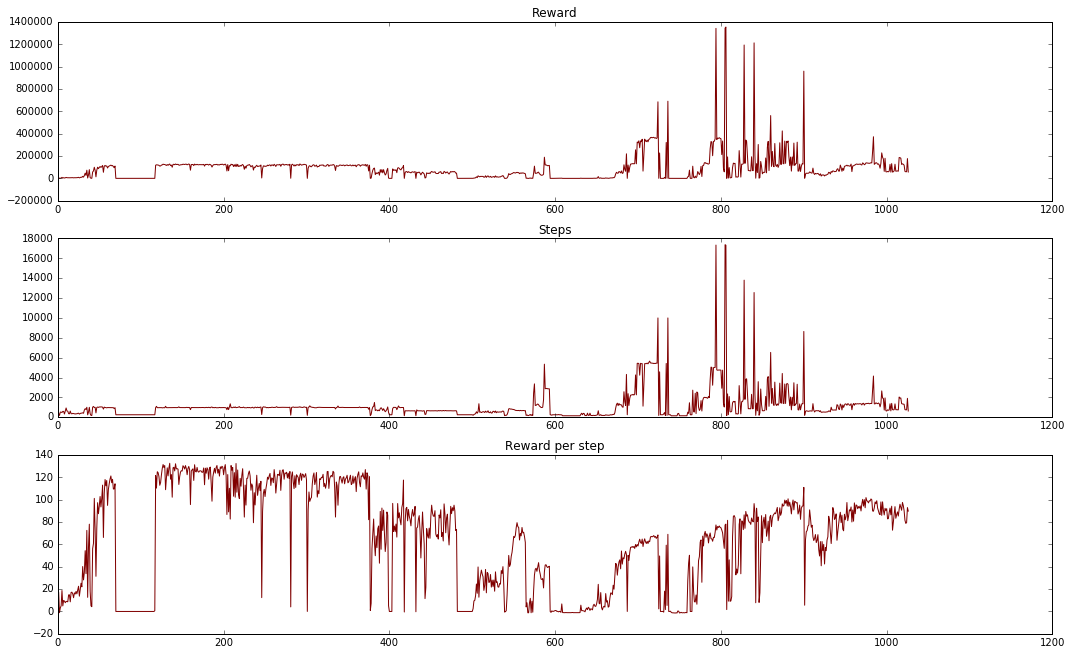

In [33]:
rewards = []
rewards_step = []
steps = []
track_name = ''
first = True
with open('../runs/e-track-2_train/rewards.csv', 'r') as f:
    data = f.readlines()
    
for reading in data:
    try:
        rewards.append(float(reading.split(', ')[0].replace('\n', '')))
        steps.append(float(reading.split(', ')[1].replace('\n', '')))
        rewards_step.append(float(reading.split(', ')[2].replace('\n', '')))
    except:
        if first:
            track_name = reading
        
label = track_name
color = cmap(1/len(rewards))
x = np.array(range(len(rewards)))
polyfit_r = np.polyfit(x, rewards, 1)
polyfit_s = np.polyfit(x, steps, 1)
polyfit_r_s = np.polyfit(x, rewards_step, 1)

plt.figure(figsize=(15, 12))       
plt.subplot(4, 1, 1)
plt.title('Reward')
#plt.plot(x, polyfit_r[0]*x + polyfit_r[1], label=label, linewidth=2, color=color)
plt.plot(rewards, alpha=1, label=label, color=color)

plt.subplot(4, 1, 2)
plt.title('Steps')
#plt.plot(x, polyfit_s[0]*x + polyfit_s[1], label=label, linewidth=2, color=color)
plt.plot(steps, alpha=1, label=label, color=color)

plt.subplot(4, 1, 3)
plt.title('Reward per step')
#plt.plot(x, polyfit_r_s[0]*x + polyfit_r_s[1], label=label, linewidth=2, color=color)
plt.plot(rewards_step, alpha=1, label=label, color=color)

# plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=3, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()